In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

In [3]:
import math

In [8]:
import os
os.listdir("test_images/")

['solidWhiteCurve.jpg',
 'solidWhiteRight.jpg',
 'solidYellowCurve.jpg',
 'solidYellowCurve2.jpg',
 'solidYellowLeft.jpg',
 'whiteCarLaneSwitch.jpg']

In [9]:
#image collections
images = os.listdir("test_images/")
imageDir = "test_images/"

('This image is:', <type 'numpy.ndarray'>, 'with dimensions:', (540L, 960L, 3L))
('This image is:', <type 'numpy.ndarray'>, 'with dimensions:', (540L, 960L, 3L))
('This image is:', <type 'numpy.ndarray'>, 'with dimensions:', (540L, 960L, 3L))
('This image is:', <type 'numpy.ndarray'>, 'with dimensions:', (540L, 960L, 3L))
('This image is:', <type 'numpy.ndarray'>, 'with dimensions:', (540L, 960L, 3L))
('This image is:', <type 'numpy.ndarray'>, 'with dimensions:', (540L, 960L, 3L))


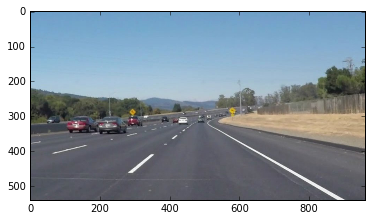

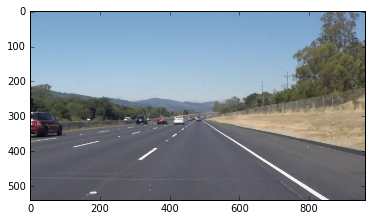

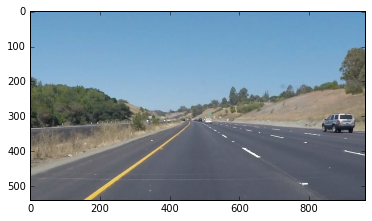

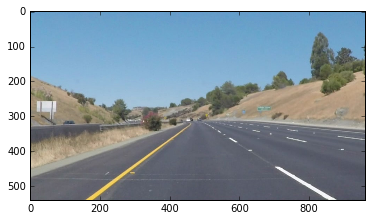

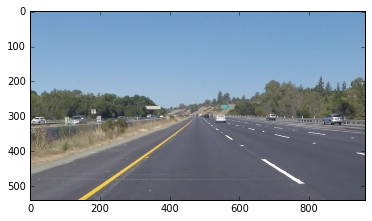

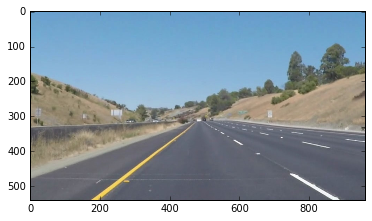

In [10]:
#reading in an image
for image in images:
    img = mpimg.imread(imageDir+image)
    print('This image is:', type(img), 'with dimensions:', img.shape)
    plt.figure()
    plt.imshow(img)

('This image is:', <type 'numpy.ndarray'>, 'with dimensions:', (540L, 960L, 3L))


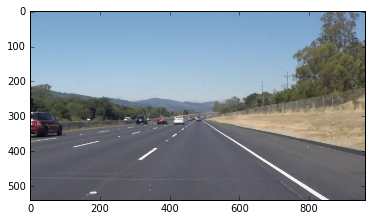

In [128]:
#printing out some stats and plotting


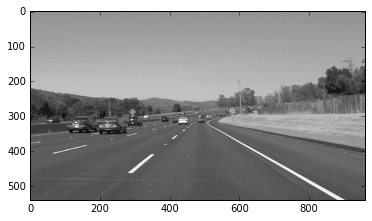

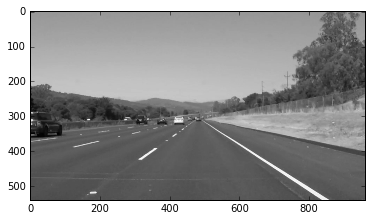

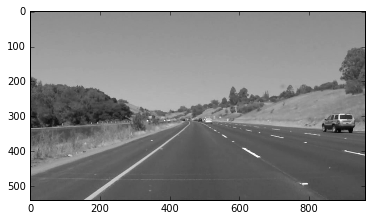

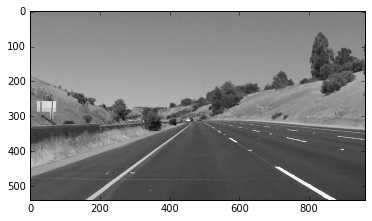

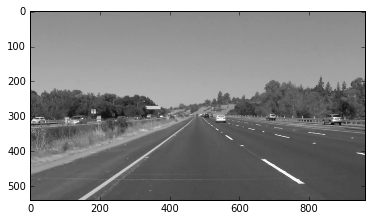

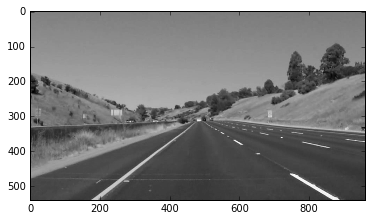

In [12]:
#first convert the image into grayscale
for image in images:
    img = mpimg.imread(imageDir+image)
    if len(img.shape)>2:
        img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    else:
        img_gray = img
    #print('This image is:', type(img_gray), 'with dimensions:', img_gray.shape)
    # plot the grayscale image
    plt.figure()
    plt.imshow(img_gray, cmap='gray')

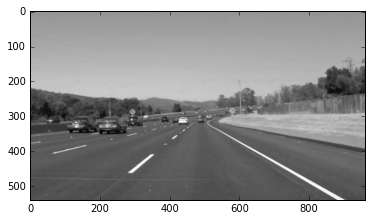

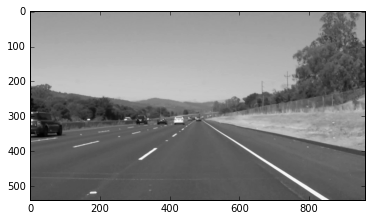

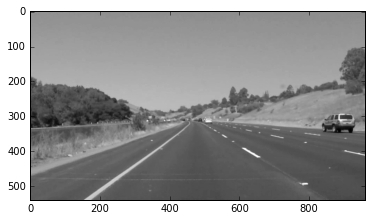

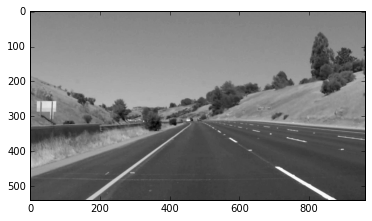

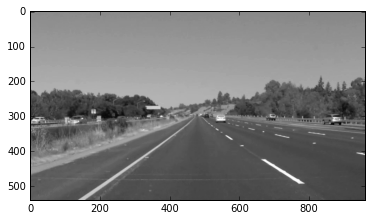

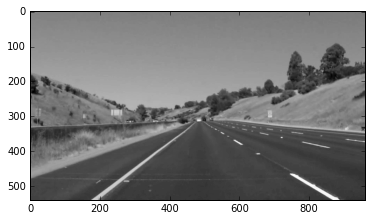

In [13]:
# Define a kernel size and apply Gaussian smoothing
for image in images:
    img = mpimg.imread(imageDir+image)
    if len(img.shape)>2:
        img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    else:
        img_gray = img
    kernel_size = 5
    blur_gray = cv2.GaussianBlur(img_gray,(kernel_size, kernel_size),0)
    plt.figure()
    plt.imshow(blur_gray, cmap='gray')

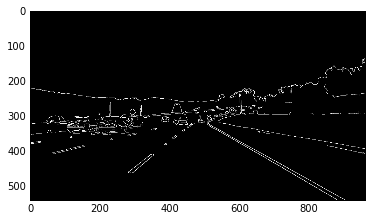

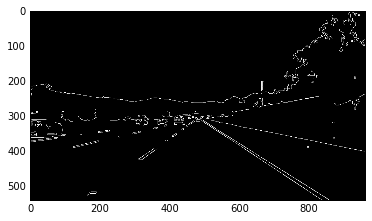

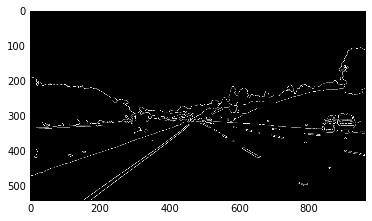

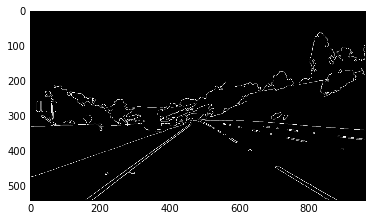

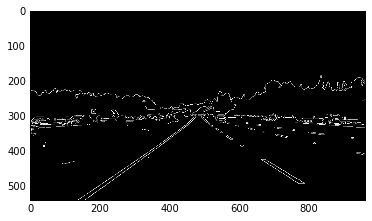

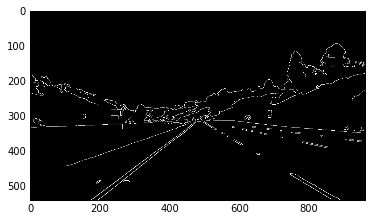

In [19]:
# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
for image in images:
    img = mpimg.imread(imageDir+image)
    if len(img.shape)>2:
        img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    else:
        img_gray = img
    kernel_size = 5
    blur_gray = cv2.GaussianBlur(img_gray,(kernel_size, kernel_size),0)
    edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
    plt.figure()
    plt.imshow(edges, cmap='gray')

In [20]:
def region_of_interest(img, vertices):
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

In [22]:
def ROI(img):
    #vertices = np.array([[img.shape[1] / 2, img.shape[0] * 0.58], [img.shape[1] / 2, img.shape[0] * 0.58],
    #        [img.shape[1], img.shape[0] * 1.], [0, img.shape[0] * 1.]], dtype=np.int32)
    imshape = img.shape
    vertices = np.array([[(0,imshape[0]),(460, 320), (490, 310), (imshape[1],imshape[0])]], dtype=np.int32)
    return region_of_interest(img, [vertices])


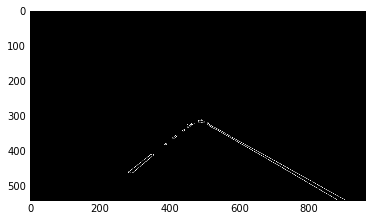

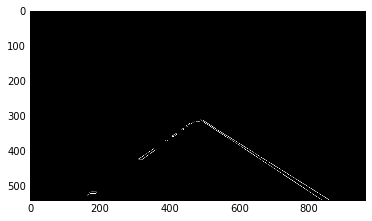

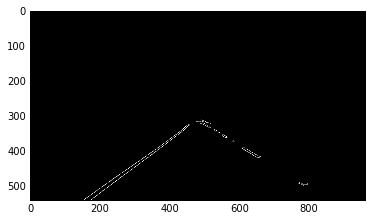

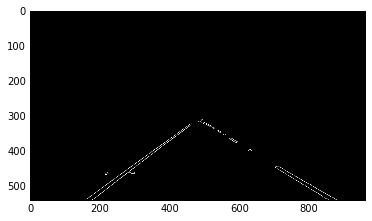

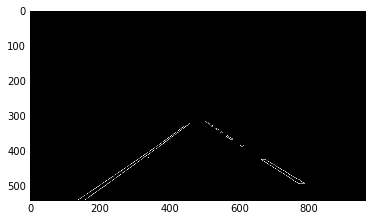

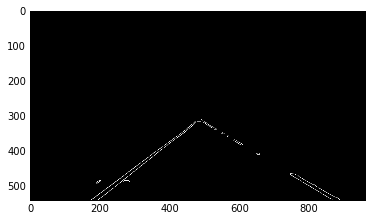

In [23]:
# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
for image in images:
    img = mpimg.imread(imageDir+image)
    if len(img.shape)>2:
        img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    else:
        img_gray = img
    kernel_size = 5
    blur_gray = cv2.GaussianBlur(img_gray,(kernel_size, kernel_size),0)
    edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
    edge_roi = ROI(edges)
    plt.figure()
    plt.imshow(edge_roi, cmap='gray')

In [24]:
def draw_lines(img,lines, color=[255, 0, 0], thickness = 2):
    for line in lines:
        for x1,y1, x2, y2 in line:
            cv2.line(img,(x1,y1),(x2,y2), color, thickness)
            
def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1],3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img 




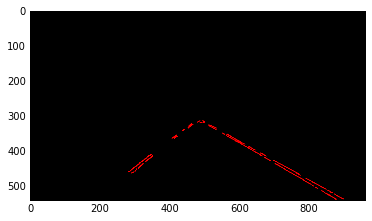

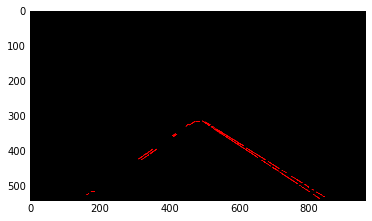

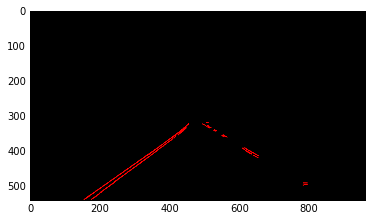

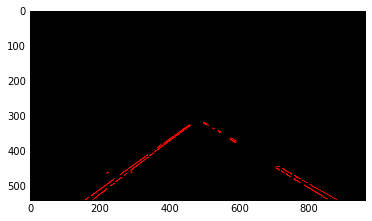

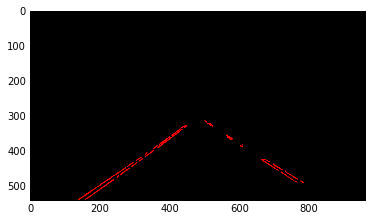

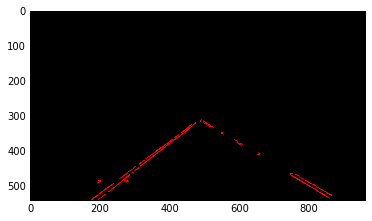

In [25]:
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 1   # minimum number of votes (intersections in Hough grid cell)
min_line_length = 5 #minimum number of pixels making up a line
max_line_gap = 1    # maximum gap in pixels between connectable line segments
# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
for image in images:
    img = mpimg.imread(imageDir+image)
    if len(img.shape)>2:
        img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    else:
        img_gray = img
    kernel_size = 5
    blur_gray = cv2.GaussianBlur(img_gray,(kernel_size, kernel_size),0)
    edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
    edge_roi = ROI(edges)
    lines_h = hough_lines(edge_roi, rho, theta, threshold, min_line_length, max_line_gap)
    plt.figure()
    plt.imshow(lines_h, cmap='gray')

In [27]:
def pipeline_lane(img):
    #Define the Hough transform parameters
    # Make a blank the same size as our image to draw on
    rho = 1 # distance resolution in pixels of the Hough grid
    theta = np.pi/180 # angular resolution in radians of the Hough grid
    threshold = 1   # minimum number of votes (intersections in Hough grid cell)
    min_line_length = 5 #minimum number of pixels making up a line
    max_line_gap = 1    # maximum gap in pixels between connectable line segments
    # Define our parameters for Canny and apply
    low_threshold = 50
    high_threshold = 150
    if len(img.shape)>2:
        img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    else:
        img_gray = img
    kernel_size = 5
    blur_gray = cv2.GaussianBlur(img_gray,(kernel_size, kernel_size),0)
    edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
    edge_roi = ROI(edges)
    lines_h = hough_lines(edge_roi, rho, theta, threshold, min_line_length, max_line_gap)
    return lines_h


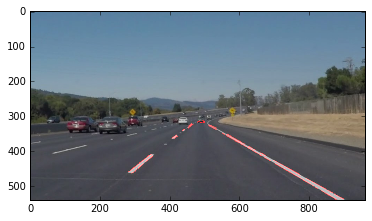

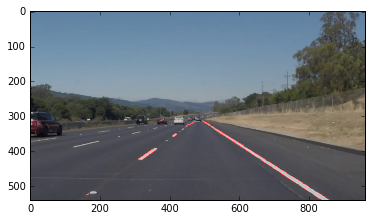

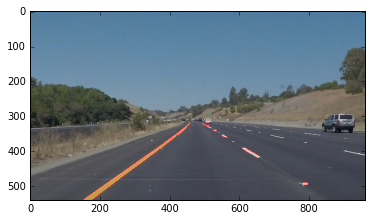

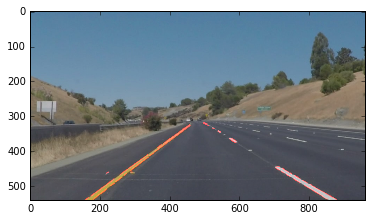

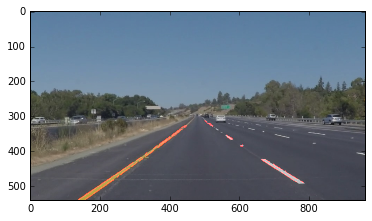

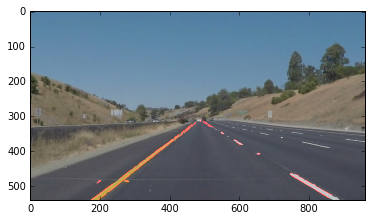

In [29]:
for image in images:
    img = mpimg.imread(imageDir+image)
    lines_h = pipeline_lane(img)
    lanes = cv2.addWeighted(img, 0.8, lines_h, 1, 0)
    plt.figure()
    plt.imshow(lanes, cmap='gray')
    split = image.split('.') 
    imgName = split[0] + '_lanes.jpg' 
    mpimg.imsave(os.path.join('result_for_test_images', imgName), lanes)